<a href="https://colab.research.google.com/github/MaiMejia/ML-Projects/blob/main/MalariaDetection_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automating Malaria Detection applying Deep Learning**

### **Content**

1.  <a href="#Context">Context</a>
2.  <a href="#Data Preprocessing">Data Preprocessing</a>
1.  <a href="#Data Exploration">Data Exploration</a>
2.  <a href="#Model Building">Model Building</a>
1.  <a href="#Selecting the Best Approach">Selecting the Best Approach</a>
2.  <a href="#Insights and Recommendations">Insights and Recommendations</a>
1.  <a href="#Next Steps">Next Steps</a>

<a name="Context"></a>
##<b>1. Context</b>

**The Disease:** Malaria is a contagious disease caused by Plasmodium parasites that are transmitted to humans through the bites of infected female Anopheles mosquitoes. The parasites enter the blood and begin damaging red blood cells (RBCs) that carry oxygen, which can result in respiratory distress and other
complications. The lethal parasites can stay alive for more than a year in a person's body without showing any symptoms. Therefore, late treatment can cause complications and could even be fatal.<br>
**The Problem:** Malaria is one of the most severe disease worldwide. Affecting pregnant women and children under five years old in tropical and subtropical areas. The current situation with global warming is boosting the proliferation of this disease.
<br>
At this moment, vaccines are still in progress and cases of resistance to antimalarial drugs are increasing.
<br>
The screening process is time-consuming. Conventional methods to detect Malaria requires expertise in the field and it is a laborious task. This is not an efficient process, which represents a high burden for the industry, and on top of that, results might fall in making wrong predictions ending in a death.<br>
**The Solution**: Therefore, a Data Science model can support the development of a more robust process for managing effectively malaria cases. Among the Data Science field, less advanced Machine Learning (ML) methods are not a good fit for complex tasks such image detection, but Deep Learning (DL), a branch of ML is a more suitable application to handle computer vision cases.

**The objective:** Determine an effective Deep Learning method for Malaria detection.<br>

*   Identify whether an image of a red blood cell is that of one infected with malaria or not.
*   Classify images as infected (parasirized) or uninfected.

**Key questions:** <br>
**1. Data Exploration:** Is the data balanced? is it possible to distinguish between a parasitized and an uninfected image?<br>
**2. Data Preprocessing:** Can blurr and color saturation techniques magnify images differences? <br>
**3. Modeling:** Which model can be a good baseline?, which other CNN models can provide better results?, how to mitigate overfitting? <br>
**4. Selecting the best model?** Why is this model selected? <br>
**5. Conclusions and Recommendations:** Do we need more research to improve current models?

**The problem formulation:** Build an efficient Computer Vision model to detect malaria, and correctly classify whether a person is infected or not.

<a name="Data Preprocessing"></a>
## <b>2. Data Preprocessing </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>

###<b> Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualizations
import matplotlib as plt
import seaborn as sns

# Loading and preparing data
from zipfile import ZipFile
import os

# Resizing the images
from PIL import Image

# Data processing
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# Unziping and loading the data
with ZipFile('/content/drive/My Drive/Caps/cell_images.zip', 'r') as zip:
  zip.extractall('/content/drive/My Drive/Caps/')

  zip.close()

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

### **Preprocessing the Train Images and Labels:** Load the data, resize images, and create 4D arrays

In [ ]:
# This step requires to load more libraries
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2  # OpenCV to resize images

# Defining paths to the Train folder
train_path = '/content/drive/My Drive/Caps/cell_images/train'  # Directory containing the train data
img_size = (64, 64)  # Resize all images to 64x64

def load_preprocess_and_save_train_data(train_directory, img_size):
    """Load images from a directory, resize them, and create 4D array of image data."""

    # Initialize lists to store images and labels (This prevent for having to rerun this code multiple times)
    train_images, train_labels = [], []

   # Determining the list of class folders, so we can ensure uninfected = 0 and parasitized = 1
    class_names = ['uninfected','parasitized']

    # Iterate through each folder (parasitized or uninfected) in the directory
    for class_name in class_names:
        class_folder = os.path.join(train_directory, class_name)

        if os.path.isdir(class_folder):
            # Iterate through all images in the class folder
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)

                # Load and resize the image
                img = cv2.imread(img_path)  # Open image with OpenCV
                img = cv2.resize(img, img_size)  # Resize the image

                # Append image and label
                train_images.append(img)
                label = 0 if class_name == 'uninfected' else 1  # Explicit label assignment
                train_labels.append(label)

    # Convert lists to numpy arrays
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)

    # Save the training data to .npy files
    np.save('/content/drive/MyDrive/Caps/data/train_images.npy', train_images)
    np.save('/content/drive/MyDrive/Caps/data/train_labels.npy', train_labels)

    print("Training data preprocessed and saved.")

    # Call the function to preprocess and save the training data
load_preprocess_and_save_train_data(train_path,img_size)

Training data preprocessed and saved.


### **Preprocessing the Test Images and Labels:** Load the data, resize images, and create 4D arrays

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2  # OpenCV to resize images

# Defining paths to the Test folder
test_path = '/content/drive/My Drive/Caps/cell_images/test'  # Directory containing the train data
img_size = (64, 64)  # Resize all images to 64x64

def load_preprocess_and_save_test_data(test_directory, img_size):
    """Load images from a directory, resize them, and create 4D array of image data."""

    # Initialize lists to store images and labels (This prevent for having to rerun this code multiple times)
    test_images, test_labels = [], []

    # Determining the list of class folders, so we can ensure uninfected = 0 and parasitized = 1
    class_names = ['uninfected','parasitized']

    # Iterate through each folder (parasitized or uninfected) in the directory
    for class_name in class_names:
        class_folder = os.path.join(test_directory, class_name)

        if os.path.isdir(class_folder):
            # Iterate through all images in the class folder
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)

                # Load and resize the image
                img = cv2.imread(img_path)  # Open image with OpenCV
                img = cv2.resize(img, img_size)  # Resize the image

                # Append image and label
                test_images.append(img)
                label = 0 if class_name == 'uninfected' else 1  # Explicit label assignment
                test_labels.append(label)

    # Convert lists to numpy arrays
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    # Save the training data to .npy files
    np.save('/content/drive/My Drive/Caps/data/test_images.npy', test_images)
    np.save('/content/drive/My Drive/Caps/data/test_labels.npy', test_labels)

    print("Testing data has been preprocessed and saved.")

    # Call the function to preprocess and save the testing data
load_preprocess_and_save_test_data(test_path,img_size)

Testing data has been preprocessed and saved.


### <b> Load the preprocessed data and avoid rerunning the previous step <b>

In [ ]:
# Load the preprocessed data from .npy files
import numpy as np

train_images = np.load('/content/drive/My Drive/Caps/data/train_images.npy')
train_labels = np.load('/content/drive/My Drive/Caps/data/train_labels.npy')
test_images = np.load('/content/drive/My Drive/Caps/data/test_images.npy')
test_labels = np.load('/content/drive/My Drive/Caps/data/test_labels.npy')

print("Data loaded!")

Data loaded!


###<b> Check the shape of train and test images

In [ ]:
# Training and Testing Images Shapes
print(f"Test images shape: {train_images.shape}")
print(f"Test labels shape: {test_images.shape}")

Test images shape: (24958, 64, 64, 3)
Test labels shape: (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [ ]:
# Training and Testing Labels Shapes
print(f"Train labels shape: {train_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")

Train labels shape: (24958,)
Test labels shape: (2600,)


**Observations and insights:** The Train dataset consists of 24,958 images and labels, reshaped to 64x64 pixels and 3 channels.<br> The Test dataset has 2,600 images and labels, accounting only for 10% of the Traininig dataset.




### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
print("(",np.min(train_images),",",np.max(train_images),")")
print("(",np.min(test_images),",",np.max(test_images),")")

( 0 , 255 )
( 0 , 255 )


####<b> Observations and insights: </b>  Pixel values of the images are in the expected range of [0, 255].



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
import pandas as pd
count_train_labels = pd.DataFrame(train_labels)[0].value_counts()
count_test_labels = pd.DataFrame(test_labels)[0].value_counts()

print("Number of Train labels in each clase:",f"{count_train_labels}")
print()
print("Number of Test labels in each clase:",f"{count_test_labels}")

Number of Train labels in each clase: 0
1    12582
0    12376
Name: count, dtype: int64

Number of Test labels in each clase: 0
0    1300
1    1300
Name: count, dtype: int64


###<b>Normalize the images

In [ ]:
# Normalizing images
train_images_norm = train_images.astype('float32')/255.0
test_images_norm = test_images.astype('float32')/255.0

In [ ]:
# Normalized images: Check the minimum and maximum pixel values in a normalized image, the new range should be of [0, 1]
print("Min value in normalized image:", train_images_norm[0].min())
print("Max value in normalized image:", train_images_norm[0].max())

Min value in normalized image: 0.0
Max value in normalized image: 0.8


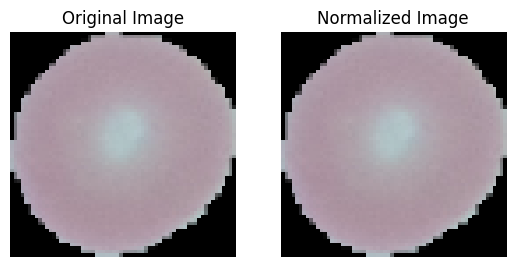

In [ ]:
# Visualizing the original image and its normalized version
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(train_images[0].astype('uint8'))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(train_images_norm[0])
plt.title("Normalized Image")
plt.axis('off')

plt.show()

**Observations and insights:** Normalizing the images helps to scale them to a 0-1 range.

###<b> Plot to check if the data is balanced

In [ ]:
# Classifying labels
train_labels = pd.DataFrame(train_labels)
train_labels[0] = train_labels[0].map({0: 'uninfected', 1: 'parasitized'})
test_labels = pd.DataFrame(test_labels)
test_labels[0] = test_labels[0].map({0: 'uninfected', 1: 'parasitized'})

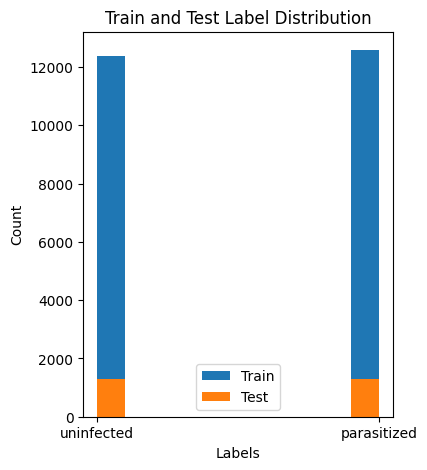

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,5))

plt.hist(train_labels[0], label='Train')
plt.hist(test_labels[0], label='Test')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Train and Test Label Distribution')
plt.legend()
plt.show()

#### <b>**Observations and insights:</b>** Test data set accounts only for 10% of the Training data set. Labels for both Test and Train data are balanced in each class (uninfected, parasitized).

<a name="Data Exploration"></a>
## <b>3. Data Exploration</b>
Let's visualize the images from the train data

In [ ]:
# Before create the visualization, let's review labels and classes:

print("Unique labels before cleaning:", train_labels[0].unique())

# Clean the labels: remove leading/trailing spaces and standardize the case (lowercase)
train_labels[0] = train_labels[0].str.strip().str.lower()

# Step 2: Map the cleaned labels to integers (0 and 1)
train_labels[0] = train_labels[0].map({'uninfected': 0, 'parasitized': 1})

# Check the cleaned labels
print("Labels after cleaning and mapping:", train_labels[0].unique())

Unique labels before cleaning: ['uninfected' 'parasitized']
Labels after cleaning and mapping: [0 1]


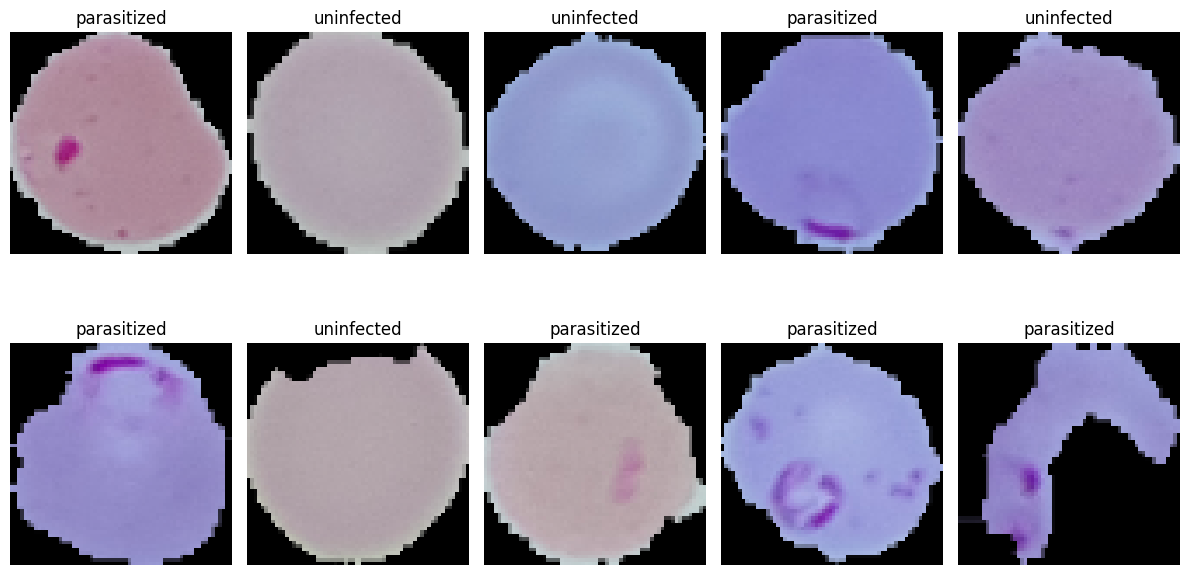

In [ ]:
import random

# Visualizing images of the training set
cols = 5
rows = 2
classes = ['uninfected','parasitized']

fig = plt.figure(figsize=(12, 7))

 # Iterate through rows and columns for visualization

for i in range(cols * rows):
    random_idx = random.randint(0, len(train_images) - 1)  # Randomly select an index
    label = train_labels.iloc[random_idx, 0]  # Get the label for the selected image

    # Map the label to the class name
    label_name = classes[label]  # Since 0 maps to 'uninfected' and 1 maps to 'parasitized'

    # Create subplot and display the image
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(train_images[random_idx])  # Use random_idx to select the image
    ax.set_title(label_name)  # Set title with the class name
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

####<b> Observations and insights:</b> When plotting random images of both classes, uninfected and parasitized, we can see that there are small differences between classes. However, as images looks similar, it might be hard to detect each class.

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

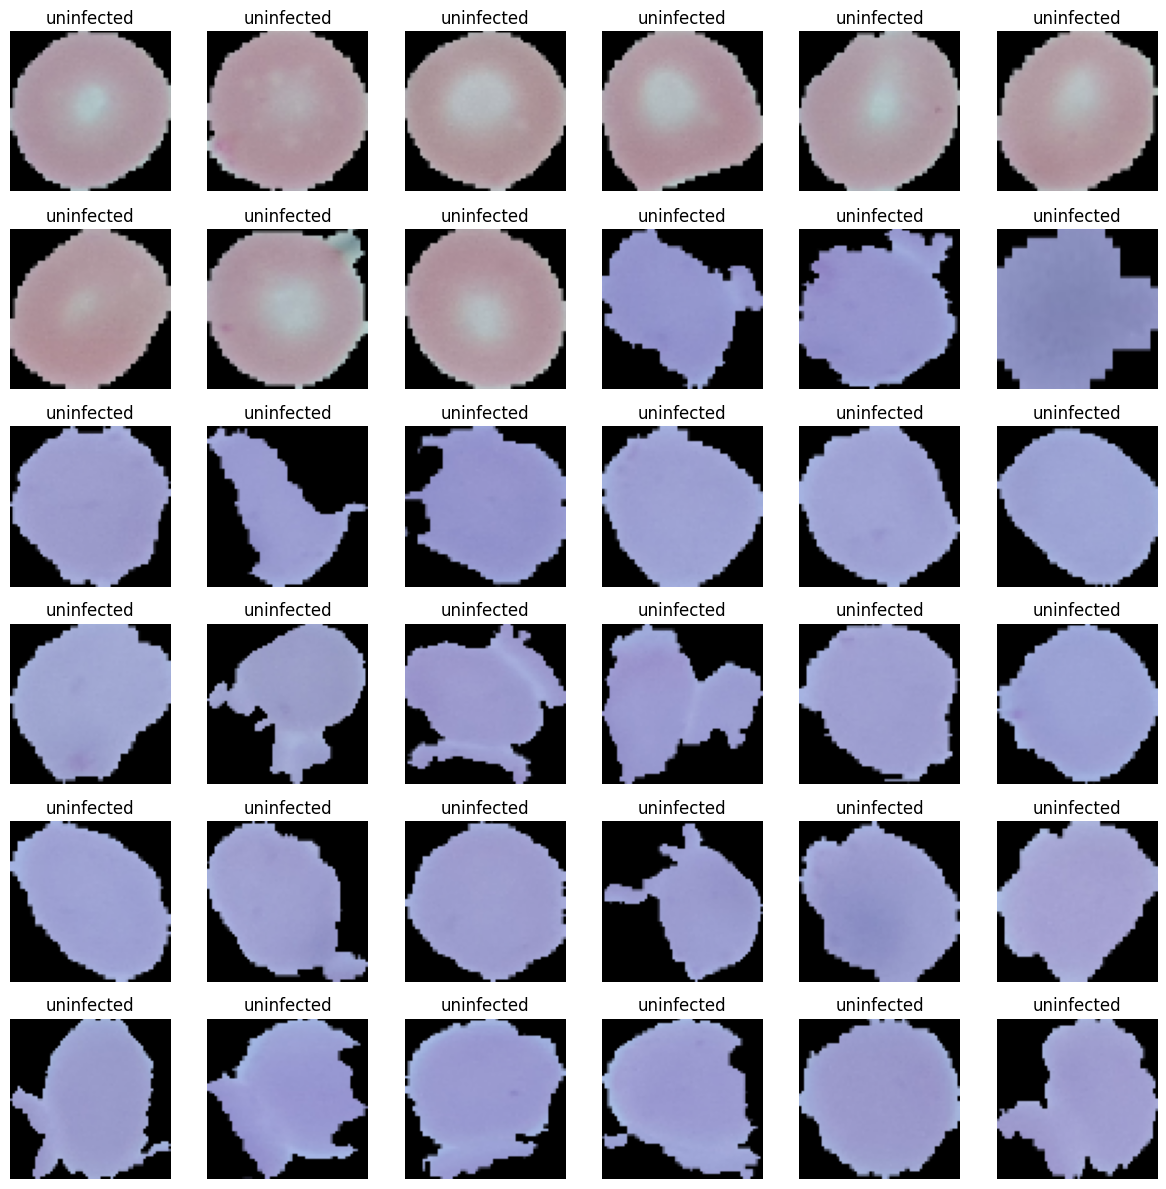

In [ ]:
# Visualizing images of the training set
cols = 6
rows = 6
classes = ['uninfected', 'parasitized']

if train_labels.iloc[0, 0] in ['uninfected', 'parasitized']:
  train_labels[0] = train_labels[0].map({'uninfected':0, 'parasitized':1})

fig = plt.figure(figsize=(12, 12))

for i in range(cols * rows):
    label = train_labels.iloc[i, 0]

    # Map the label with the class name
    label_name = classes[label]

    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(train_images[i])
    ax.set_title(label_name)
    ax.axis('off')

plt.tight_layout()
plt.show()

####<b>Observations and insights:</b> All these images belogs to the uninfected class. There are no red spots in the images, which is an indication of the parasitized cells.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
def plot_mean_images(images,category):

    mean_image = np.mean(images, axis=0).astype(np.uint8) # Ensuring valid pixel value for a good image

    plt.figure(figsize=(5, 5))

    plt.imshow(mean_image)
    plt.title(f'Mean {category} Images')

    plt.axis('off')
    plt.show()

    return mean_image

<b> Mean image for parasitized


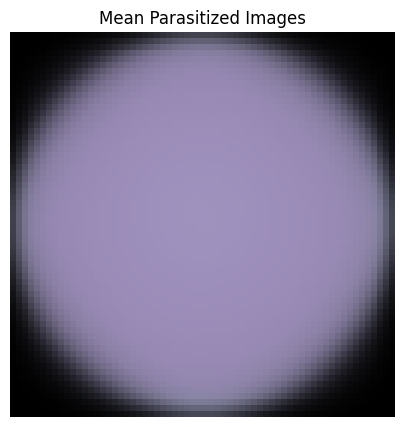

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
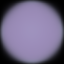

In [ ]:
train_labels = np.array(train_labels).flatten()

images_parasitized = train_images[train_labels == 1]
plot_mean_images(images_parasitized, 'Parasitized')

<b> Mean image for uninfected

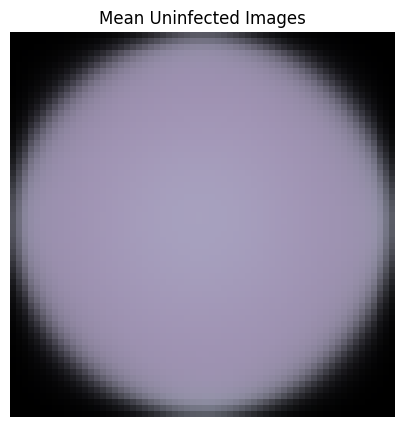

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
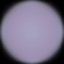

In [ ]:
images_uninfected = train_images[train_labels == 0]
plot_mean_images(images_uninfected, 'Uninfected')

####**Observations and insights:**
The mean of both Parasitized and Uninfected images look very similar, for which it is hard to distinguish which one belongs to each category. This require to make some adjustment to the images to overcome this issue.

### <b>Converting RGB to HSV of Images using OpenCV

In [ ]:
import cv2

def convert_rgb_to_hsv(images):
    hsv_images = []

    for img in images:
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)

      # Converting RGB images to HSV
        hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        hsv_images.append(hsv_img)

    return hsv_images

###<b> Converting the train data

In [ ]:
hsv_train_images = convert_rgb_to_hsv(train_images)
print(train_images.shape)

(24958, 64, 64, 3)


###<b> Converting the test data

In [ ]:
hsv_test_images = convert_rgb_to_hsv(test_images)
print(test_images.shape)

(2600, 64, 64, 3)


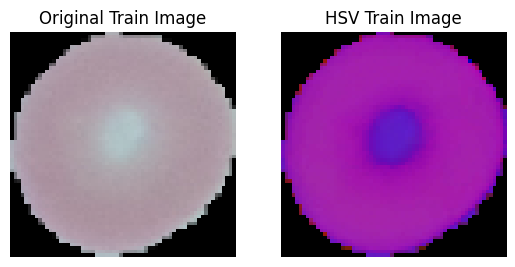

In [ ]:
# Create Original image vs. hsv images from the Train dataset
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(train_images[0].astype('uint8'))
plt.title("Original Train Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hsv_train_images[0])
plt.title("HSV Train Image")
plt.axis('off')

plt.show()

#### <b>**Observations and insights:</b>** By turning images from RGB (Red, Blue, Green) to HSV (Hue, Saturation, Value) might make more trackable images differences through their color.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
import cv2
import numpy as np

def gaussian_blurring(images, kernel_size=(5, 5), sigma=0):
    blurred_images = []

    for img in images:
        blurred_img = cv2.GaussianBlur(img, kernel_size, sigma)
        blurred_images.append(blurred_img)

    return np.array(blurred_images)

In [ ]:
gaus_train_images = gaussian_blurring(train_images)
print(gaus_train_images.shape)

(24958, 64, 64, 3)


###<b> Gaussian Blurring on test data

In [ ]:
gaus_test_images = gaussian_blurring(test_images)
print(gaus_test_images.shape)

(2600, 64, 64, 3)


#### **Visualizing gaus blurred test images**

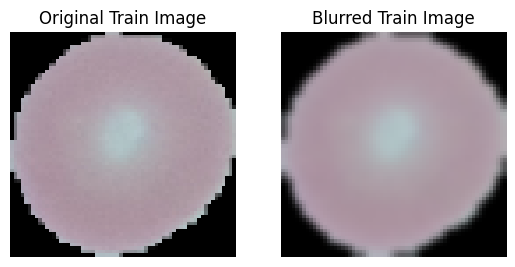

In [ ]:
# Create Original image vs. Blurred images from the Train dataset
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(train_images[0].astype('uint8'))
plt.title("Original Train Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaus_train_images[0])
plt.title("Blurred Train Image")
plt.axis('off')

plt.show()

####**Observations and insights:**

Blurring images reduce noise and help to make images smoother by reducing variations. Images are similar in color and details which might impact models ability to predict images correctly.

<a name="Model Building"></a>
## **4. Model Building**

In [ ]:
# Clean Keras backend
from keras import backend
backend.clear_session()

###<b> Import libraries

In [ ]:
# Setting the Seed
import random

# Build the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.metrics import binary_crossentropy, Accuracy

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

###<b>Load the preprocessed data

In [ ]:
# Load the preprocessed data from .npy files
import numpy as np

train_images = np.load('/content/drive/My Drive/Caps/data/train_images.npy')
train_labels = np.load('/content/drive/My Drive/Caps/data/train_labels.npy')
test_images = np.load('/content/drive/My Drive/Caps/data/test_images.npy')
test_labels = np.load('/content/drive/My Drive/Caps/data/test_labels.npy')

####<B>One Hot Encoding the train and test labels

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# As train and test labels are a NumPy array. Make sure both labels are integers.
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Step 1: One-hot encode the integer labels (0 and 1)
train_labels_enc = to_categorical(train_labels, num_classes=2)
test_labels_enc = to_categorical(test_labels, num_classes=2)

####<B>Normalize Images

In [ ]:
# Normalizing images
train_images_norm = train_images.astype('float32')/255.0
test_images_norm = test_images.astype('float32')/255.0

###<b>**Model 1 Baseline CNN</b>**
This model contanis 3 Convolutional layers with MaxPooling layers, and a Fully Connected Dense layer.

####<b> Building the model

In [ ]:
# Set the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model():

# Initializing the sequential model
  cnn_model = Sequential()

# Adding Input Layer explicitly at the beginning of the model
  cnn_model.add(InputLayer(shape=(64, 64, 3)))

# 1st Convolutional layer
  cnn_model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
  cnn_model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional layer
  cnn_model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
  cnn_model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional layer
  cnn_model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
  cnn_model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the previous layer to prepare the data for Dense layers
  cnn_model.add(Flatten())

# Fully connected Dense layer
  cnn_model.add(Dense(128, activation = 'relu'))
  cnn_model.add(layers.Dropout(0.5))

  cnn_model.add(Dense(2, activation = 'softmax'))

  return cnn_model

####<b> Compiling the model

In [ ]:
# Compiling the model defining loss, optimizer and performance metric
cnn_model = cnn_model()

cnn_model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,234 (653.26 KB)

 Trainable params: 167,234 (653.26 KB)

 Non-trainable params: 0 (0.00 B)

<b> Using Callbacks

In [ ]:
# Callbacks are useful for avoid unnecessary processing (early stopping) of the monitored metric preventing overfitting, or decreasing the learning rate when the validation metrics stop improving.

# Early Stop
early_stopping = EarlyStopping(monitor = 'val_loss', # Metric to be monitored
                                        patience = 3, # Number of epochs with no improvement after which training will be stopped
                                        restore_best_weights = True, # Whether to restore model weights from the epoch with the best value of the monitored quantity
                                        verbose = 1 # Mode 1 displays messages when the callback takes an action
                                        )

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',  # Monitor validation loss
                            factor = 0.5,  # Reduce learning rate by a factor of 0.5
                            patience = 2,  # Allow 2 epochs of no improvement
                            verbose = 1  # Display message when the learning rate decreased
                              )

<b> Fit and train our Model

In [ ]:
# Fitting and train  the model
cnn_history = cnn_model.fit(
                            train_images_norm,
                            train_labels_enc,
                            epochs=20,
                            batch_size=32,
                            validation_split = 0.2,
                           callbacks=[early_stopping, reduce_lr])

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 99s 156ms/step - accuracy: 0.7118 - loss: 0.5301 - val_accuracy: 0.9014 - val_loss: 0.2109 - learning_rate: 0.0010
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 140s 154ms/step - accuracy: 0.9737 - loss: 0.0905 - val_accuracy: 0.9481 - val_loss: 0.1394 - learning_rate: 0.0010
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 146s 160ms/step - accuracy: 0.9794 - loss: 0.0693 - val_accuracy: 0.9537 - val_loss: 0.1142 - learning_rate: 0.0010
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 141s 158ms/step - accuracy: 0.9804 - loss: 0.0638 - val_accuracy: 0.9688 - val_loss: 0.0838 - learning_rate: 0.0010
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 144s 162ms/step - accuracy: 0.9818 - loss: 0.0549 - val_accuracy: 0.9557 - val_loss: 0.1188 - learning_rate: 0.0010
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9829 - loss: 0.0527
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
624/624 ━━━━━━━━━━━━━━━━━━━━ 139s 157ms/step - accuracy: 

#####<b> Evaluating the model on test data

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_images_norm,
                                               test_labels_enc,
                                               batch_size=32)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9893 - loss: 0.0366
Test Loss: 0.04633370041847229
Test Accuracy: 0.9850000143051147


<b>Plotting the train and validation curves

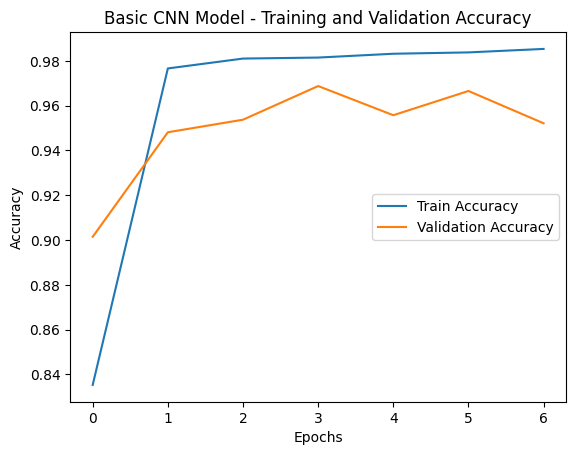

In [ ]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Accuracy
plt.plot(cnn_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label = 'Validation Accuracy')

# Adding Tittle and Labels
plt.title('Basic CNN Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding the legend
plt.legend(loc='center right')

plt.show()

<b> Predicting Results:</b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


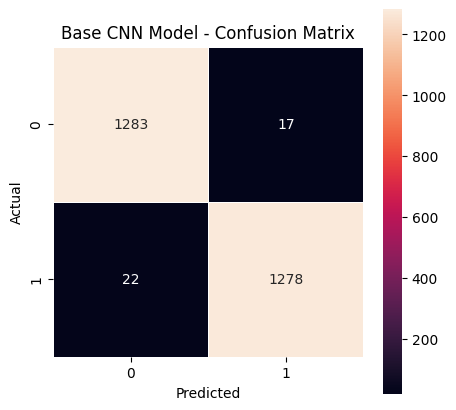

In [ ]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn_model.predict(test_images_norm)  # Get model predictions (probabilities)

# Convert one-hot encoded labels back to single class indices
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes (0 or 1)

# Convert one-hot encoded test labels to single class indices
y_test_classes = np.argmax(test_labels_enc, axis=1)  # True classes (0 or 1)

# Compute the confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.4, fmt='d', square=True, ax=ax)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Base CNN Model - Confusion Matrix')
plt.show()

**Observations:** The Basic CNN model seems to be overfitted, the training accuracy performed over 0.98, while the validation accuracy remains below 0.96. This model performed well in training data but struggled to generalize results on unseen data.
So, Im going to test the new model adding a few more layers and trying to see if I can improve the model.

###<b> Model 2 - Tuned CNN: </b>
This model contains 4 Convolutional layers with Max Pooling and Dropouts, and a Fully Connected Dense layer.
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
# Clean Keras backend
from keras import backend
backend.clear_session()

####<b> Loading Libraries</b>

In [ ]:
# Setting the Seed
import random

# Build the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.metrics import binary_crossentropy, Accuracy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Load the preprocessed data from .npy files
import numpy as np

train_images = np.load('/content/drive/My Drive/Caps/data/train_images.npy')
train_labels = np.load('/content/drive/My Drive/Caps/data/train_labels.npy')
test_images = np.load('/content/drive/My Drive/Caps/data/test_images.npy')
test_labels = np.load('/content/drive/My Drive/Caps/data/test_labels.npy')

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# As train and test labels are a NumPy array. Make sure both labels are integers.
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# One-hot encode the integer labels (0 and 1)
train_labels_enc = to_categorical(train_labels, num_classes=2)
test_labels_enc = to_categorical(test_labels, num_classes=2)

In [ ]:
# Normalizing images
train_images_norm = train_images.astype('float32')/255.0
test_images_norm = test_images.astype('float32')/255.0

####<b> Building the Model

In [ ]:
# Set the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn2_model():

# Initializing the sequential model
  cnn2_model = Sequential()

# Adding Input Layer explicitly at the beginning of the model
  cnn2_model.add(InputLayer(shape=(64, 64, 3)))

# 1st Convolutional layer
  cnn2_model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
  cnn2_model.add(layers.MaxPooling2D((2, 2)))
  cnn2_model.add(layers.Dropout(0.2))

# 2nd Convolutional layer
  cnn2_model.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
  cnn2_model.add(layers.MaxPooling2D((2, 2)))
  cnn2_model.add(layers.Dropout(0.2))

# 3rd Convolutional layer
  cnn2_model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
  cnn2_model.add(layers.MaxPooling2D((2, 2)))
  cnn2_model.add(layers.Dropout(0.2))

# 4th Convolutional layer
  cnn2_model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
  cnn2_model.add(layers.MaxPooling2D((2, 2)))
  cnn2_model.add(layers.Dropout(0.2))

# Flatten the output of the previous layer to prepare the data for Dense layers
  cnn2_model.add(Flatten())

# Fully connected Dense layer
  cnn2_model.add(Dense(128, activation = 'relu'))

  cnn2_model.add(layers.Dropout(0.5))

  cnn2_model.add(Dense(2, activation = 'softmax'))

  return cnn2_model

####<b> Compiling the model

In [ ]:
# Compiling the model defining loss, optimizer and performance metric
cnn2_model = cnn2_model()

cnn2_model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
cnn2_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

<b> Using Callbacks

In [ ]:
# Early Stop
early_stopping = EarlyStopping(monitor = 'val_loss', # Metric to be monitored
                                        patience = 3, # Number of epochs with no improvement after which training will be stopped
                                        restore_best_weights = True, # Whether to restore model weights from the epoch with the best value of the monitored quantity
                                        verbose = 1 # Mode 1 displays messages when the callback takes an action
                                        )

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',  # Monitor validation loss
                            factor = 0.5,  # Reduce learning rate by a factor of 0.5
                            patience = 2,  # Allow 2 epochs of no improvement
                            verbose = 1  # Display message when the learning rate decreased
                              )

<b>Fit and Train the model

In [ ]:
cnn2_history = cnn2_model.fit(train_images_norm,
                            train_labels_enc,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.2,
                          callbacks=[early_stopping, reduce_lr])

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 116s 182ms/step - accuracy: 0.6278 - loss: 0.6495 - val_accuracy: 0.9077 - val_loss: 0.2140 - learning_rate: 0.0010
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 141s 181ms/step - accuracy: 0.9561 - loss: 0.1416 - val_accuracy: 0.9399 - val_loss: 0.1672 - learning_rate: 0.0010
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 120s 192ms/step - accuracy: 0.9731 - loss: 0.0918 - val_accuracy: 0.9483 - val_loss: 0.1762 - learning_rate: 0.0010
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 139s 188ms/step - accuracy: 0.9755 - loss: 0.0842 - val_accuracy: 0.9539 - val_loss: 0.1503 - learning_rate: 0.0010
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 140s 185ms/step - accuracy: 0.9765 - loss: 0.0715 - val_accuracy: 0.9601 - val_loss: 0.1247 - learning_rate: 0.0010
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 142s 185ms/step - accuracy: 0.9780 - loss: 0.0744 - val_accuracy: 0.9653 - val_loss: 0.1206 - learning_rate: 0.0010
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accura

####<b> Evaluating the model

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn2_model.evaluate(test_images_norm,
                                               test_labels_enc,
                                               batch_size=32)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9796 - loss: 0.0568
Test Loss: 0.05668023228645325
Test Accuracy: 0.9800000190734863


<b> Plotting the train and the validation curves

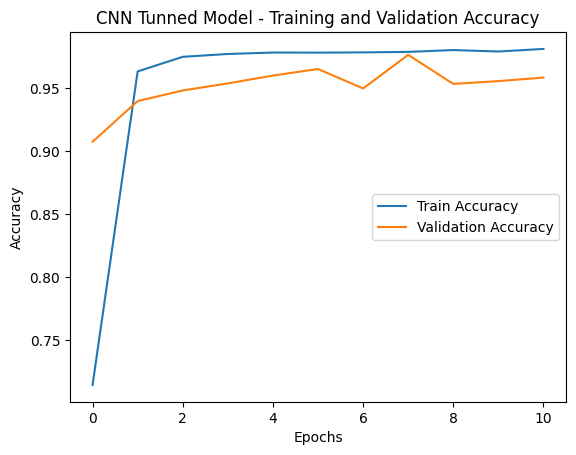

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(cnn2_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(cnn2_history.history['val_accuracy'], label = 'Validation Accuracy')

# Adding Tittle and Labels
plt.title('CNN Tunned Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding the legend
plt.legend(loc='center right')

plt.show()

<b> Predicting Results:</b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step


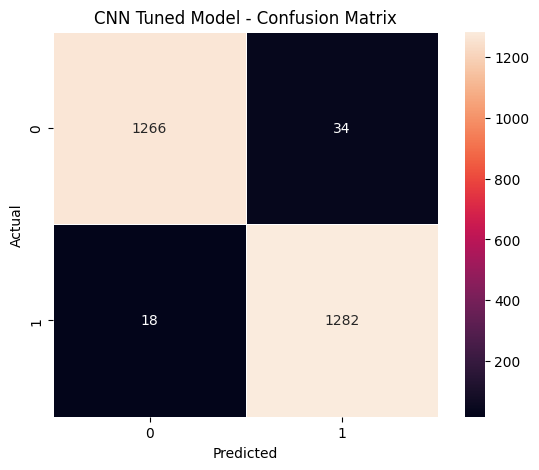

In [ ]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn2_model.predict(test_images_norm)  # Get model predictions (probabilities)

# Convert one-hot encoded labels back to single class indices
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes (0 or 1)

# Convert one-hot encoded test labels to single class indices
y_test_classes = np.argmax(test_labels_enc, axis=1)  # True classes (0 or 1)

# Compute the confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.4, fmt='d', square=True, ax=ax)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Tuned Model - Confusion Matrix')
plt.show()

###<b>Observations:</b><br>
The Tuned CNN model seems to performed better, train and validation accuracy are closer.<br>Now let's build a model with LeakyRelu as the activation function and using BatchNormalization.

###<b> Model 3 - CNN with Batch Normalization

In [ ]:
# Cleaning Keras backend
from keras import backend
backend.clear_session()

In [ ]:
# Load the preprocessed data from .npy files
import numpy as np

train_images = np.load('/content/drive/My Drive/Caps/data/train_images.npy')
train_labels = np.load('/content/drive/My Drive/Caps/data/train_labels.npy')
test_images = np.load('/content/drive/My Drive/Caps/data/test_images.npy')
test_labels = np.load('/content/drive/My Drive/Caps/data/test_labels.npy')

####<b> Loading Libraries</b>

In [ ]:
# Setting the Seed
import random

# Build the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.metrics import binary_crossentropy, Accuracy

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# As train and test labels are a NumPy array. Make sure both labels are integers.
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# One-hot encode the integer labels (0 and 1)
train_labels_enc = to_categorical(train_labels, num_classes=2)
test_labels_enc = to_categorical(test_labels, num_classes=2)

In [ ]:
# Normalizing images
train_images_norm = train_images.astype('float32')/255.0
test_images_norm = test_images.astype('float32')/255.0

####<b> Building the Model

In [ ]:
# Set the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn3_model():

# Initializing the sequential model
  cnn3_model = Sequential()

# Adding Input Layer explicitly at the beginning of the model
  cnn3_model.add(InputLayer(shape=(64, 64, 3)))

# 1st Convolutional layer
  cnn3_model.add(Conv2D(32, kernel_size = (3,3)))
  cnn3_model.add(LeakyReLU(negative_slope = 0.1))
  cnn3_model.add(layers.MaxPooling2D((2, 2)))
  cnn3_model.add(layers.Dropout(0.2))

# 2nd Convolutional layer
  cnn3_model.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
  cnn3_model.add(LeakyReLU(negative_slope = 0.1))
  cnn3_model.add(layers.MaxPooling2D((2, 2)))
  cnn3_model.add(BatchNormalization())    # Adding a BatchNormalization layer
  cnn3_model.add(layers.Dropout(0.2))

# 3rd Convolutional layer
  cnn3_model.add(Conv2D(32, kernel_size = (3,3)))
  cnn3_model.add(LeakyReLU(negative_slope = 0.1))
  cnn3_model.add(layers.MaxPooling2D((2, 2)))
  cnn3_model.add(BatchNormalization())   # Adding another BatchNormalization layer
  cnn3_model.add(layers.Dropout(0.2))

# Flatten the output of the previous layer to prepare the data for Dense layers
  cnn3_model.add(Flatten())

# Fully connected Dense layer
  cnn3_model.add(Dense(128, activation = 'relu'))
  cnn3_model.add(layers.Dropout(0.5))

  cnn3_model.add(Dense(2, activation = 'softmax'))

  return cnn3_model

####<b>Compiling the model

In [ ]:
cnn3_model = cnn3_model()

cnn3_model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
cnn3_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,490 (654.26 KB)

 Trainable params: 167,362 (653.76 KB)

 Non-trainable params: 128 (512.00 B)

<b> Using callbacks

In [ ]:
# Early Stop
early_stopping = EarlyStopping(monitor = 'val_loss', # Metric to be monitored
                                        patience = 3, # Number of epochs with no improvement after which training will be stopped
                                        restore_best_weights = True, # Whether to restore model weights from the epoch with the best value of the monitored quantity
                                        verbose = 1 # Mode 1 displays messages when the callback takes an action
                                        )

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',  # Monitor validation loss
                            factor = 0.5,  # Reduce learning rate by a factor of 0.5
                            patience = 2,  # Allow 2 epochs of no improvement
                            verbose = 1  # Display message when the learning rate decreased
                              )

<b>Fit and train the model

In [ ]:
cnn3_history = cnn3_model.fit(
                            train_images_norm,
                            train_labels_enc,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.2,
                          callbacks=[early_stopping, reduce_lr])

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 165s 256ms/step - accuracy: 0.6735 - loss: 0.6457 - val_accuracy: 0.6907 - val_loss: 1.2135 - learning_rate: 0.0010
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 176s 214ms/step - accuracy: 0.9529 - loss: 0.1519 - val_accuracy: 0.9217 - val_loss: 0.2446 - learning_rate: 0.0010
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 133s 201ms/step - accuracy: 0.9696 - loss: 0.1095 - val_accuracy: 0.9327 - val_loss: 0.1956 - learning_rate: 0.0010
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 157s 225ms/step - accuracy: 0.9723 - loss: 0.0970 - val_accuracy: 0.9201 - val_loss: 0.2537 - learning_rate: 0.0010
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9761 - loss: 0.0894
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
624/624 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.9761 - loss: 0.0894 - val_accuracy: 0.9335 - val_loss: 0.2228 - learning_rate: 0.0010
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 140s 213ms/step - accuracy:

####<b>Evaluating the model

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn3_model.evaluate(test_images_norm,
                                               test_labels_enc,
                                               batch_size=32)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9884 - loss: 0.0510
Test Loss: 0.07975978404283524
Test Accuracy: 0.9769230484962463


<b>Plotting the train and validation accuracy

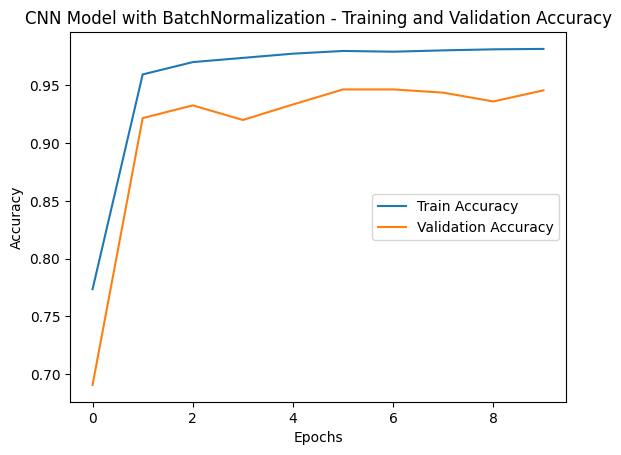

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(cnn3_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(cnn3_history.history['val_accuracy'], label = 'Validation Accuracy')

# Adding Tittle and Labels
plt.title('CNN Model with BatchNormalization - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding the legend
plt.legend(loc='center right')

plt.show()

<b> Confusion Matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step


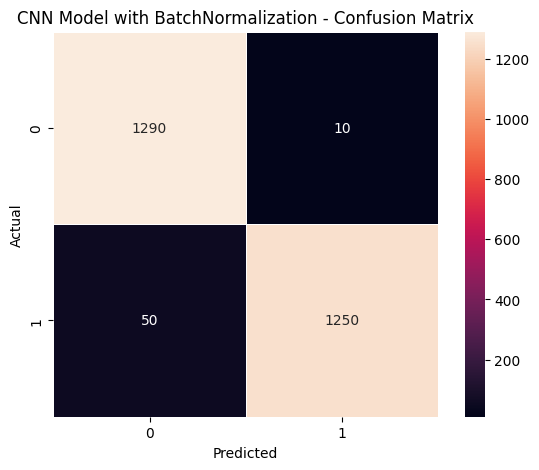

In [ ]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn3_model.predict(test_images_norm)  # Get model predictions (probabilities)

# Convert one-hot encoded labels back to single class indices
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes (0 or 1)

# Convert one-hot encoded test labels to single class indices
y_test_classes = np.argmax(test_labels_enc, axis=1)  # True classes (0 or 1)

# Compute the confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.4, fmt='d', square=True, ax=ax)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Model with BatchNormalization - Confusion Matrix')
plt.show()


### **Observations and insights:** The CNN model adding Batch Normalization did not improve. Overfitting has increased, the training data performs really well, but when testing the model in unseen data, the model does not perform well.

### **<b>Model 4 - CNN with Data Augmentation**</b>

**As images of uninfected and parasitized classes are similar, models are struggling to identify classes correctly.** Let's build a model with Image Data Augmentation to see if this model shows better results.






In [ ]:
# Cleaning keras backend
from keras import backend
backend.clear_session()

#### **Loading Libraries to run the Model**

In [ ]:
# Setting the Seed
import random

# Build the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.metrics import binary_crossentropy, Accuracy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Load the preprocessed data from .npy files
import numpy as np

train_images = np.load('/content/drive/My Drive/Caps/data/train_images.npy')
train_labels = np.load('/content/drive/My Drive/Caps/data/train_labels.npy')
test_images = np.load('/content/drive/My Drive/Caps/data/test_images.npy')
test_labels = np.load('/content/drive/My Drive/Caps/data/test_labels.npy')

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# As train and test labels are a NumPy array. Make sure both labels are integers.
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# One-hot encode the integer labels (0 and 1)
train_labels_enc = to_categorical(train_labels, num_classes=2)
test_labels_enc = to_categorical(test_labels, num_classes=2)

In [ ]:
# Normalizing images
train_images_norm = train_images.astype('float32')/255.0
test_images_norm = test_images.astype('float32')/255.0

####<b> Use image data generator

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

# One-hot encode the labels for training and validation sets
y_train_onehot = to_categorical(y_train, num_classes=2)  # Assuming binary classification (2 classes)
y_val_onehot = to_categorical(y_val, num_classes=2)  # Same for validation

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.5,
                                   rotation_range = 30,
                                   rescale = 1./255)

val_datagen  = ImageDataGenerator(rescale = 1./255)

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train_onehot, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val_onehot, batch_size = 64, seed = 42, shuffle = True)

####<B>Visualizing Augmented images

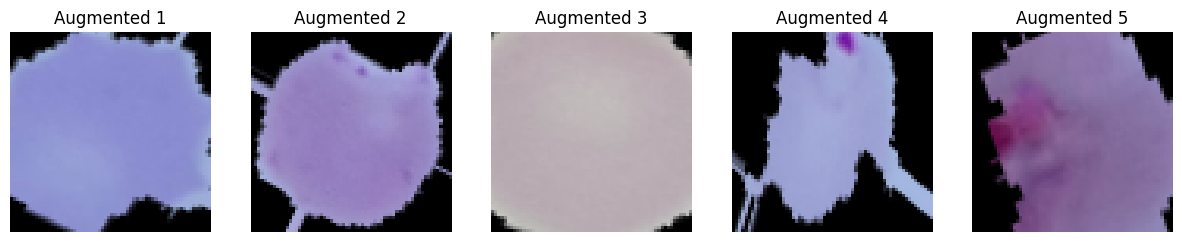

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a batch of images from the train_generator
augmented_images, augmented_labels = next(train_generator)

# Create a plot to display 5 augmented images (you can adjust this number)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Loop through the first 5 images in the batch
for i in range(5):
    ax = axes[i]
    ax.imshow(augmented_images[i])  # Display the image
    ax.axis('off')  # Hide axes for a cleaner look
    ax.set_title(f"Augmented {i+1}")  # Set the title for each image

# Display the plot
plt.show()

####<b>Observations and insights:</b> Images looks bigger and the red spot of the parasitized images seem to be more visible. Let's see if this model can perceive this.

####<b>Building the Model

In [ ]:
# Set the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn4_model():

# Initializing the sequential model
  cnn4_model = Sequential()

# Adding Input Layer explicitly at the beginning of the model
  cnn4_model.add(InputLayer(shape=(64, 64, 3)))

# 1st Convolutional layer with LeakyReLU
  cnn4_model.add(Conv2D(32, kernel_size = (3,3)))
  cnn4_model.add(LeakyReLU(negative_slope = 0.1))
  cnn4_model.add(layers.MaxPooling2D((2, 2)))
  cnn4_model.add(layers.Dropout(0.2))

# 2nd Convolutional layer with LeakyReLU
  cnn4_model.add(Conv2D(32, kernel_size = (3,3), padding = 'same'))
  cnn4_model.add(LeakyReLU(negative_slope = 0.1))
  cnn4_model.add(layers.MaxPooling2D((2, 2)))
  cnn4_model.add(BatchNormalization())
  cnn4_model.add(layers.Dropout(0.2))

# 3rd Convolutional layer with LeakyReLU
  cnn4_model.add(Conv2D(32, kernel_size = (3,3)))
  cnn4_model.add(LeakyReLU(negative_slope = 0.1))
  cnn4_model.add(layers.MaxPooling2D((2, 2)))
  cnn4_model.add(BatchNormalization())
  cnn4_model.add(layers.Dropout(0.2))

# 4th Convolutional layer with LeakyReLU
  cnn4_model.add(Conv2D(32, kernel_size = (3,3)))
  cnn4_model.add(LeakyReLU(negative_slope = 0.1))
  cnn4_model.add(layers.MaxPooling2D((2, 2)))
  cnn4_model.add(BatchNormalization())
  cnn4_model.add(layers.Dropout(0.2))

# Flatten the output to pass into Dense layers
  cnn4_model.add(Flatten())

# Fully connected Dense layer
  cnn4_model.add(Dense(128, activation = 'relu'))
  cnn4_model.add(layers.Dropout(0.5))

  cnn4_model.add(Dense(2, activation = 'softmax'))

  return cnn4_model

<b> Compiling the Model

In [ ]:
cnn4_model = cnn4_model()

cnn4_model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
cnn4_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │              

 Total params: 45,794 (178.88 KB)

 Trainable params: 45,602 (178.13 KB)

 Non-trainable params: 192 (768.00 B)

<b>Using Callbacks

In [ ]:
# Early Stop
early_stopping = EarlyStopping(monitor = 'val_loss', # Metric to be monitored
                                        patience = 3, # Number of epochs with no improvement after which training will be stopped
                                        restore_best_weights = True, # Whether to restore model weights from the epoch with the best value of the monitored quantity
                                        verbose = 1 # Mode 1 displays messages when the callback takes an action
                                        )

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',  # Monitor validation loss
                            factor = 0.5,  # Reduce learning rate by a factor of 0.5
                            patience = 2,  # Allow 2 epochs of no improvement
                            verbose = 1  # Display message when the learning rate decreased
                              )

<b> Fit and Train the model

In [ ]:
cnn4_history = cnn4_model.fit(train_generator,
                            epochs=20,
                            batch_size=32,
                            validation_data= val_generator,
                          callbacks=[early_stopping, reduce_lr])

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 143s 443ms/step - accuracy: 0.6348 - loss: 0.7050 - val_accuracy: 0.5046 - val_loss: 1.0993 - learning_rate: 0.0010
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 134s 428ms/step - accuracy: 0.8735 - loss: 0.3171 - val_accuracy: 0.9349 - val_loss: 0.1590 - learning_rate: 0.0010
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 140s 423ms/step - accuracy: 0.9137 - loss: 0.2350 - val_accuracy: 0.9665 - val_loss: 0.1011 - learning_rate: 0.0010
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 134s 425ms/step - accuracy: 0.9227 - loss: 0.2118 - val_accuracy: 0.9780 - val_loss: 0.0807 - learning_rate: 0.0010
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 132s 422ms/step - accuracy: 0.9268 - loss: 0.2035 - val_accuracy: 0.9762 - val_loss: 0.0788 - learning_rate: 0.0010
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 135s 431ms/step - accuracy: 0.9338 - loss: 0.1933 - val_accuracy: 0.9802 - val_loss: 0.0747 - learning_rate: 0.0010
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 132s 423ms/step - accura

####<B>Evaluating the model

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn4_model.evaluate(test_images_norm,
                                               test_labels_enc,
                                               batch_size=32)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9819 - loss: 0.0752
Test Loss: 0.07646108418703079
Test Accuracy: 0.9776923060417175


<b>Plot the train and validation accuracy

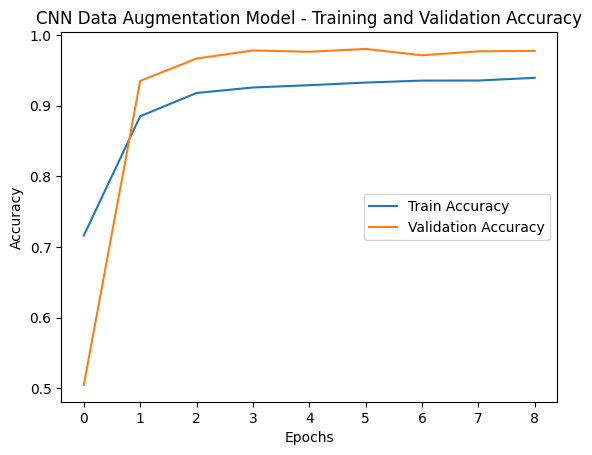

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(cnn4_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(cnn4_history.history['val_accuracy'], label = 'Validation Accuracy')

# Adding Tittle and Labels
plt.title('CNN Data Augmentation Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding the legend
plt.legend(loc='center right')

plt.show()

<B>Plotting the classification report and confusion matrix

In [ ]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn4_model.predict(test_images_norm)  # Get model predictions (probabilities)

# Convert one-hot encoded labels back to single class indices
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes (0 or 1)

# Convert one-hot encoded test labels to single class indices
y_test_classes = np.argmax(test_labels_enc, axis=1)  # True classes (0 or 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step


In [ ]:
# Classification Report
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



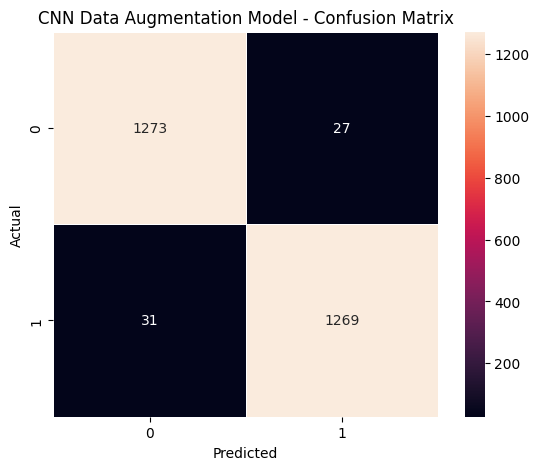

In [ ]:
# Plot the confusion matrix

# Compute the confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test_classes,
                                       y_pred_classes)

# Craete the plot
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.4, fmt='d', square=True, ax=ax)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Data Augmentation Model - Confusion Matrix')
plt.show()

### <b>**Observations:**</b> The validation accuracy is higher than the train validation which is sign of not performing well.

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

###<b>**Model 5 - CNN with Pretrained model (VGG16) </b>**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Cleaning keras backend
from keras import backend
backend.clear_session()

In [ ]:
# Setting the Seed
import random

# Build the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization,LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Loading VGG16 libraries
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.metrics import binary_crossentropy, Accuracy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Load the preprocessed data from .npy files
import numpy as np

train_images = np.load('/content/drive/My Drive/Caps/data/train_images.npy')
train_labels = np.load('/content/drive/My Drive/Caps/data/train_labels.npy')
test_images = np.load('/content/drive/My Drive/Caps/data/test_images.npy')
test_labels = np.load('/content/drive/My Drive/Caps/data/test_labels.npy')

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# As train and test labels are a NumPy array. Make sure both labels are integers.
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# One-hot encode the integer labels (0 and 1)
train_labels_enc = to_categorical(train_labels, num_classes=2)
test_labels_enc = to_categorical(test_labels, num_classes=2)

In [ ]:
# Normalizing images
train_images_norm = train_images.astype('float32')/255.0
test_images_norm = test_images.astype('float32')/255.0

####<b>Building the PreTrained Model

In [ ]:
# Set the seed
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
vgg = VGG16(include_top =False,
            weights = 'imagenet',
            input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Model

# Get the last layer iof VGG16
transfer_layer = vgg.get_layer('block5_pool')

# Freeze the VGG16 layers
vgg.trainable = False

# Add classification layers on top of the transfer layer
x = Flatten()(transfer_layer.output)  # Flatten the output of the VGG16 model

# Add Dense layer with 256 neurons and relu activation
x = Dense(128, activation = 'relu')(x)

# Add Dropout to avoid overfitting
x = Dropout(0.3)(x)

# Add a Dense layer
x = Dense(64, activation = 'relu')(x)

# Add BatchNormalization
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

cnn5_model = Model(vgg.input, pred) # Initializing the model
cnn5_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,985,602 (57.17 MB)

 Trainable params: 270,786 (1.03 MB)

 Non-trainable params: 14,714,816 (56.13 MB)

####<b>Compiling the model

In [ ]:
cnn5_model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
cnn5_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,985,602 (57.17 MB)

 Trainable params: 270,786 (1.03 MB)

 Non-trainable params: 14,714,816 (56.13 MB)

<b> using callbacks

In [ ]:
# Early Stop
early_stopping = EarlyStopping(monitor = 'val_loss', # Metric to be monitored
                                        patience = 3, # Number of epochs with no improvement after which training will be stopped
                                        restore_best_weights = True, # Whether to restore model weights from the epoch with the best value of the monitored quantity
                                        verbose = 1 # Mode 1 displays messages when the callback takes an action
                                        )

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',  # Monitor validation loss
                            factor = 0.5,  # Reduce learning rate by a factor of 0.5
                            patience = 2,  # Allow 2 epochs of no improvement
                            verbose = 1  # Display message when the learning rate decreased
                              )

<b>Fit and Train the model

In [ ]:
cnn5_history = cnn5_model.fit(train_images_norm,
                              train_labels_enc,
                            epochs=20,
                            batch_size=32,
                            validation_split=0.2,
                           callbacks=[early_stopping, reduce_lr])

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1366s 2s/step - accuracy: 0.8619 - loss: 0.3236 - val_accuracy: 0.8616 - val_loss: 0.3533 - learning_rate: 0.0010
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1415s 2s/step - accuracy: 0.9253 - loss: 0.1965 - val_accuracy: 0.8626 - val_loss: 0.3387 - learning_rate: 0.0010
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1403s 2s/step - accuracy: 0.9367 - loss: 0.1737 - val_accuracy: 0.9241 - val_loss: 0.1828 - learning_rate: 0.0010
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1451s 2s/step - accuracy: 0.9359 - loss: 0.1680 - val_accuracy: 0.9353 - val_loss: 0.1378 - learning_rate: 0.0010
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 1444s 2s/step - accuracy: 0.9437 - loss: 0.1590 - val_accuracy: 0.9195 - val_loss: 0.1850 - learning_rate: 0.0010
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9442 - loss: 0.1526
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
624/624 ━━━━━━━━━━━━━━━━━━━━ 1387s 2s/step - accuracy: 0.9442 - loss:

####<b> Evaluating the model

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn5_model.evaluate(test_images_norm,
                                            test_labels_enc,
                                               batch_size=32)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9071 - loss: 0.2564
Test Loss: 0.2123824805021286
Test Accuracy: 0.9176923036575317


<b>Plot the train and validation accuracy

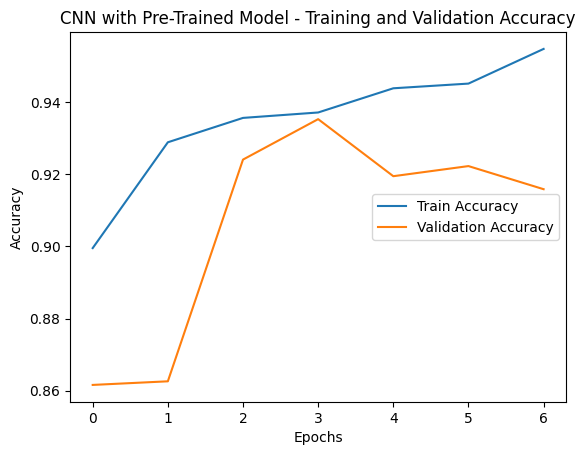

In [ ]:
# Plotting the Training and Validation Accuracy
plt.plot(cnn5_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(cnn5_history.history['val_accuracy'], label = 'Validation Accuracy')

# Adding Tittle and Labels
plt.title('CNN with Pre-Trained Model - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Adding the legend
plt.legend(loc='center right')

plt.show()

<b>Plotting the classification report and confusion matrix

In [ ]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn5_model.predict(test_images_norm)  # Get model predictions (probabilities)

# Convert one-hot encoded labels back to single class indices
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes (0 or 1)

# Convert one-hot encoded test labels to single class indices
y_test_classes = np.argmax(test_labels_enc, axis=1)  # True classes (0 or 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step


In [ ]:
# Classification Report

print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1300
           1       0.89      0.96      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600



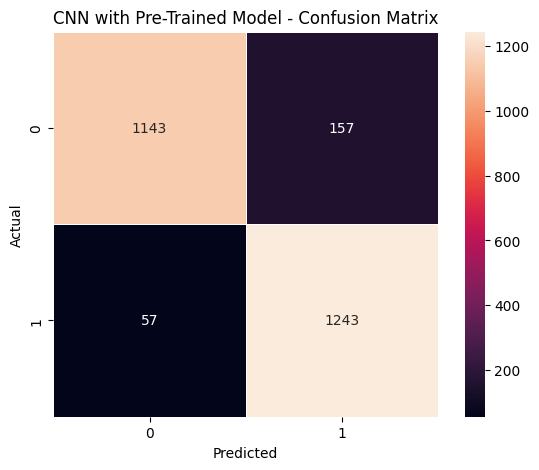

In [ ]:
# Plot the confusion matrix

# Compute the confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test_classes, y_pred_classes)

# Create the plot
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, linewidths=0.4, fmt='d', square=True, ax=ax)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN with Pre-Trained Model - Confusion Matrix')
plt.show()

###<b>**Observations and insights:</b>** The Accuracy of the validation set improved until the 3rd epoch and then, start decreasing. The train accuracy remains performing too well. Overall, this model did not perform well.



<a name="Selecting the Best Approach"></a>
##<b>5. Selecting the Best Approach</b>

The second model (Tuned CNN) achieved the best results, with a **Recall of 98.6%**, only **18 False Negatives (FN)**, and an **accuracy of 98.%**.

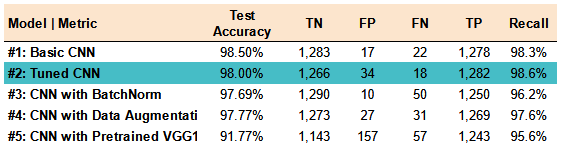

In [ ]:
# Save the model (architecture + weights + optimizer) with the best accuracy score
cnn2_model.save("/content/drive/My Drive/Caps/cnn_tunedmodel.keras")

####<b> Observations and Conclusions drawn from the final model:</b>
* The tuned CNN model had the lowest number of False Negatives among all models.<br>
* Although this model did not have the highest test accuracy score among all models, this model is more effective detecting True Positive and False Negative.



<a name="Insights and Recommendations"></a>
## **6. Insights and Recommendations**

####**Refined insights**:
- Images are similar for which defining an effective model will require more experimentation.
- The base CNN model succeeded detecting True Negative, however, this might not be relevant from a business stand-point.
- Single variation over several models might not be an efficient process due to computational limitations. For example, start with a model that combines the base model , the tuned CNN model, and the CNN model with BatchNormalization.

####**Comparison of various techniques and their relative performance**:
- The CNN with Pre-trained model, CNN with BatchNormalization and CNN with Data Augmentation achieved a high accuracy score (over 97%) but the overall performance in missclassifying malaria was high compared to the Basic and Tuned CNN models. The selected model (Tuned CNN ) misclassified less parasitized images than all models.

<a name="Next Steps"></a>
##**7. Next Steps**

###<b>**Proposal for the final solution design**:</b>
Based on the previous results, the Tuned CNN model is the final solution. This model achieved the lowest number of False Negatives (FN) and the highest Recall (98.6%), which I believe are key metrics, these results implies that the Tuned model missclasifyied less infected images compared to the other models. Ultimately, that is the goal of this analysis, increasing efficiency on the management of malaria detection.

This model can be deploy in a choosen platform (AWS, GGP, Azure, etc) to start making prediction and see how the detection process improve.
Keep monitoring and mainting the model is essential to achieve better results. This will also provide a more robust knowledge of the fields (Deep Learning and malaria) to continue building a more effective model.

## **References**
CDC. Malaria's Impact Worldwide .https://www.cdc.gov/malaria/php/impact/index.html<br>
CDC. Malaria Diagnosis Testing. https://www.cdc.gov/malaria/hcp/diagnosis-testing/index.html

WHO. World Malaria Report 2023. https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2023

NIH. Deep Machine Learning Model Trade-Offs for Malaria Elimination in Resource-Constrained Locations. https://pmc.ncbi.nlm.nih.gov/articles/PMC8614791/